# ANN Project - CIFAR-10 Dataset

## What does CIFAR-10 dataset contains?

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
The dataset is cached within the tensorflow Python package and has the following classes:
1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

More information about this dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html)

Now, let's go to the coding process

### Import libraries

In [5]:
from random import randint

import numpy as np
from keras import models, datasets, layers, Model
import tensorflow as tf
from keras.applications import ResNet50, DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam

import matplotlib.pyplot as plt

### Loading data

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

height, width, channels = 32, 32, 3
nb_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train_original = x_train.copy()
x_test_original = x_test.copy()
y_train_original = y_train.copy()
y_test_original = y_test.copy()

x_train = x_train.reshape((-1, height, width, channels))
x_test = x_test.reshape((-1, height, width, channels))

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

print(f"x_train.shape: {x_train.shape}, x_test.shape: {x_test.shape}")
print(f"y_train.shape:{y_train.shape}, y_test.shape:{y_test.shape}")

170498071/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3), x_test.shape: (10000, 32, 32, 3)
y_train.shape:(50000, 10), y_test.shape:(10000, 10)


### Show data in pictures

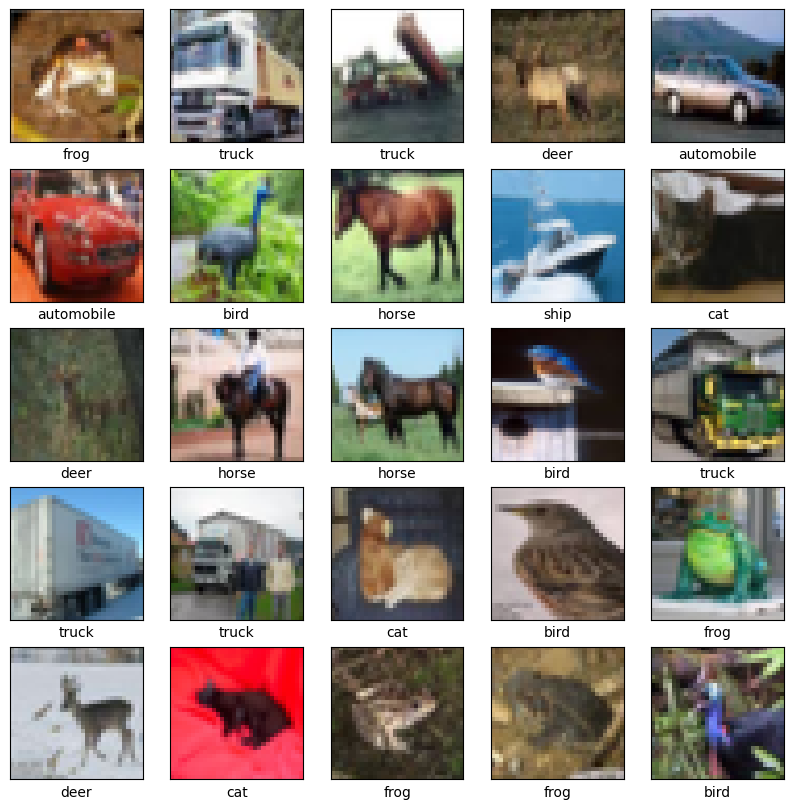

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_original[i])
    # The CIFAR labels happen to be arrays, which is why we need the extra index
    plt.xlabel(class_names[y_train_original[i][0]])
plt.show()

## Part I - Construct & Train models

### Create CNN

In [7]:
model_simple = models.Sequential()
model_simple.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_simple.add(layers.MaxPooling2D((2, 2)))
model_simple.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_simple.add(layers.MaxPooling2D((2, 2)))
model_simple.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [8]:
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
Total params: 93,248
Trainable params: 93,248
Non-traina

In [9]:
model_simple.add(layers.Flatten())
model_simple.add(layers.Dense(64, activation='relu'))
model_simple.add(layers.Dense(10))

In [10]:
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [11]:
model_simple.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = model_simple.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.0678 - accuracy: 0.4755 - val_loss: 0.0563 - val_accuracy: 0.6009
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.0520 - accuracy: 0.6391 - val_loss: 0.0492 - val_accuracy: 0.6631
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.0453 - accuracy: 0.6965 - val_loss: 0.0449 - val_accuracy: 0.6926
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.0408 - accuracy: 0.7340 - val_loss: 0.0439 - val_accuracy: 0.6972
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.0378 - accuracy: 0.7593 - val_loss: 0.0423 - val_accuracy: 0.7178
Epoch 6/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.0352 - accuracy: 0.7812 - val_loss: 0.0409 - val_accuracy: 0.7279
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.0329 - accuracy: 0.8027 - val_loss: 0.0416 -

In [33]:
%store model_simple
%store history

Stored 'model_simple' (Sequential)
Stored 'history' (History)


313/313 - 5s - loss: 0.0414 - accuracy: 0.7280 - 5s/epoch - 15ms/step


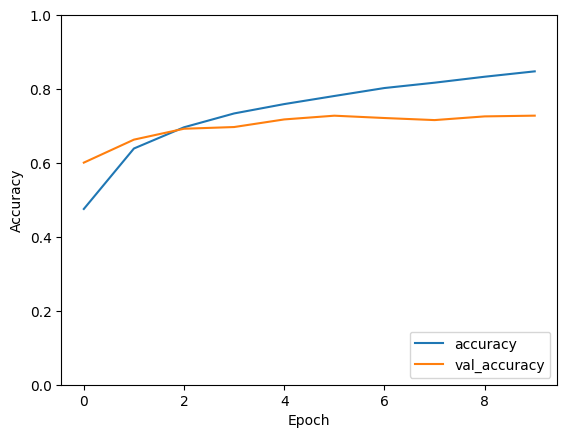

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_simple.evaluate(x_test,  y_test, verbose=2)

In [13]:
print(f"Accuracy score: {test_acc}")

Accuracy score: 0.7279999852180481


### Create DenseNet base model

In [30]:
# DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a dense output layer with 10 units (one for each CIFAR-10 class)
predictions = Dense(10, activation='softmax')(x)

29084464/29084464 [==============================] - 0s 0us/step


In [31]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [32]:
# Compile the model
model.compile(optimizer=Adam(), loss='mse', metrics=['accuracy'])

In [33]:
# Train the model
history_densenet = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 741s 465ms/step - loss: 0.0753 - accuracy: 0.4064 - val_loss: 0.0982 - val_accuracy: 0.2925
Epoch 2/10
1563/1563 [==============================] - 757s 485ms/step - loss: 0.0704 - accuracy: 0.4497 - val_loss: 0.0675 - val_accuracy: 0.4661
Epoch 3/10
1563/1563 [==============================] - 792s 506ms/step - loss: 0.0656 - accuracy: 0.5001 - val_loss: 0.1266 - val_accuracy: 0.1968
Epoch 4/10
1563/1563 [==============================] - 798s 511ms/step - loss: 0.0695 - accuracy: 0.4643 - val_loss: 0.0741 - val_accuracy: 0.4298
Epoch 5/10
1563/1563 [==============================] - 780s 499ms/step - loss: 0.0607 - accuracy: 0.5490 - val_loss: 0.0548 - val_accuracy: 0.5834
Epoch 6/10
1563/1563 [==============================] - 771s 493ms/step - loss: 0.0554 - accuracy: 0.5950 - val_loss: 0.0547 - val_accuracy: 0.5873
Epoch 7/10
1563/1563 [==============================] - 768s 492ms/step - loss: 0.0490 - accuracy: 0.6459 - val_

In [36]:
%store model
%store history_densenet

Stored 'model' (Functional)
Stored 'history_densenet' (History)


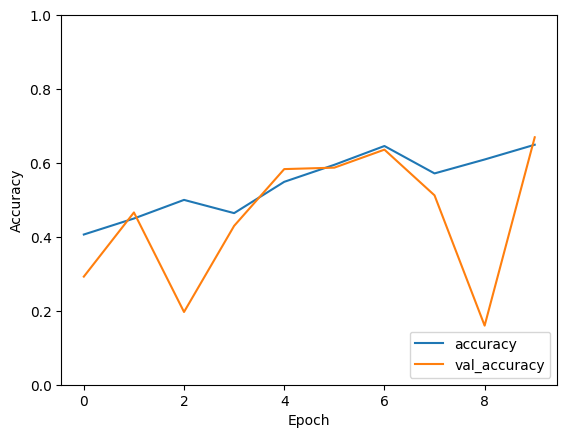

In [34]:
plt.plot(history_densenet.history['accuracy'], label='accuracy')
plt.plot(history_densenet.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [35]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 [==============================] - 28s 91ms/step - loss: 0.0459 - accuracy: 0.6695
Test loss: 0.045899730175733566
Test accuracy: 0.6694999933242798


## Part II - Create Adversarial Model

### Fast Gradient Signed Method (FGSM) attack

In [36]:
# Function to calculate adversary noise
def generate_adversary(image, label, model):
  image = tf.cast(image, tf.float32)

  with tf.GradientTape() as tape:
    tape.watch(image)
    prediction = model(image)
    loss = tf.keras.losses.MSE(label, prediction)
  gradient = tape.gradient(loss, image)
  sign_grad = tf.sign(gradient)

  return sign_grad

### Simple CNN Model

Prediction from CNN: dog


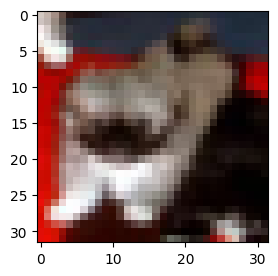

In [37]:
# Selecting random image for testing
rand_idx = randint(0,49999)
image = x_train[rand_idx].reshape((1, height, width, channels))
label = y_train[rand_idx]

print(f'Prediction from CNN: {class_names[np.where(label==1)[0][0]]}')
plt.figure(figsize=(3,3))
plt.imshow(image.reshape((height, width, channels)))
plt.show()

In [38]:
# Adding the adversary noise to image
perturbations = generate_adversary(image,label, model_simple).numpy()
adversarial = image + (perturbations * 0.05)

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 30ms/step


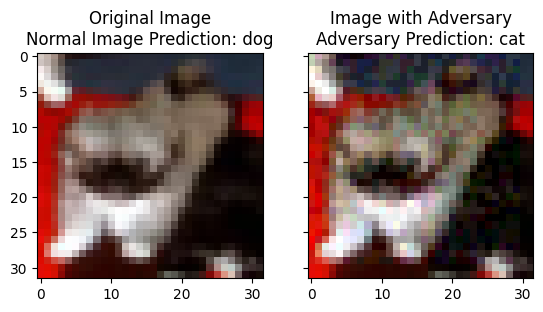

In [41]:
# Comparing both images
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image.reshape(height,width, channels))
ax1.set_title(f"Original Image\nNormal Image Prediction: {class_names[model_simple.predict(image).argmax()]}")
ax2.imshow(adversarial.reshape(height,width, channels))
ax2.set_title(f"Image with Adversary\nAdversary Prediction: {class_names[model_simple.predict(adversarial).argmax()]}")
plt.show()

In [42]:
# Comparing predictions
print(f'Normal Image Prediction: {class_names[model_simple.predict(image).argmax()]}')
print(f"Adversary Prediction: {class_names[model_simple.predict(adversarial).argmax()]}")

1/1 [==============================] - 0s 25ms/step
Normal Image Prediction: dog
1/1 [==============================] - 0s 26ms/step
Adversary Prediction: cat


### DenseNet Model

Prediction from CNN: bird


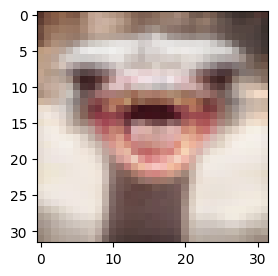

In [53]:
# Selecting random image for testing
rand_idx = randint(0,49999)
image = x_train[rand_idx].reshape((1, height, width, channels))
label = y_train[rand_idx]

print(f'Prediction from CNN: {class_names[np.where(label==1)[0][0]]}')
plt.figure(figsize=(3,3))
plt.imshow(image.reshape((height, width, channels)))
plt.show()

In [54]:
# Adding the adversary noise to image
perturbations = generate_adversary(image,label, model).numpy()
adversarial = image + (perturbations * 0.05)

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 34ms/step


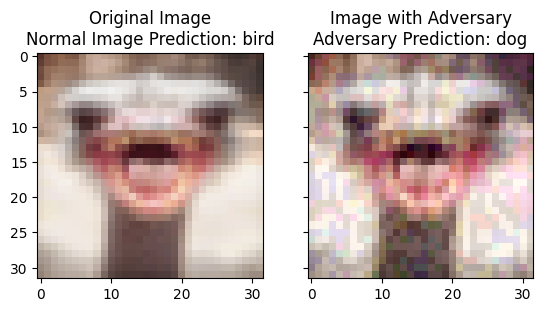

In [56]:
# Comparing both images
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image.reshape(height,width, channels))
ax1.set_title(f"Original Image\nNormal Image Prediction: {class_names[model.predict(image).argmax()]}")
ax2.imshow(adversarial.reshape(height,width, channels))
ax2.set_title(f"Image with Adversary\nAdversary Prediction: {class_names[model.predict(adversarial).argmax()]}")
plt.show()

In [50]:
# Comparing predictions
print(f'Normal Image Prediction: {class_names[model.predict(image).argmax()]}')
print(f"Adversary Prediction: {class_names[model.predict(adversarial).argmax()]}")

1/1 [==============================] - 0s 45ms/step
Normal Image Prediction: horse
1/1 [==============================] - 0s 44ms/step
Adversary Prediction: frog


### Generate a batch of images with adversary attacks

In [51]:
# A Function for generating a batch of images with adversary examples
def adversary_generator(batch_size, model):
  while True:
    images = []
    labels = []
    for batch in range(batch_size):
      N = randint(0, 49999)
      label = y_train[N]
      image = x_train[N].reshape((1,height, width, channels))

      perturbations = generate_adversary(image, label, model).numpy()
      adversarial = image + (perturbations * 0.1)

      images.append(adversarial)
      labels.append(label)

      if batch%1000 == 0:
        print(f"{batch} images generated")

    images = np.asarray(images).reshape((batch_size, height, width, channels))
    labels = np.asarray(labels)

    yield images, labels

### Simple CNN Model

In [52]:
# Testing model accuracy on adversarial examples
x_adversarial, y_adversarial = next(adversary_generator(10000, model_simple))
ad_acc = model_simple.evaluate(x_adversarial, y_adversarial, verbose=0)
print(f"Accuracy on Adversarial Examples: {ad_acc[1]*100}")

0 images generated
1000 images generated
2000 images generated
3000 images generated
4000 images generated
5000 images generated
6000 images generated
7000 images generated
8000 images generated
9000 images generated
Accuracy on Adversarial Examples: 19.179999828338623


### DenseNet Model

In [58]:
# Testing model accuracy on adversarial examples
x_adversarial, y_adversarial = next(adversary_generator(1000, model))
ad_acc = model.evaluate(x_adversarial, y_adversarial, verbose=0)
print(f"Accuracy on Adversarial Examples: {ad_acc[1]*100}")

0 images generated
Accuracy on Adversarial Examples: 1.7999999225139618


In [60]:
%store ad_acc

Stored 'ad_acc' (list)


### Basic Iterative Method (BIM)

#### Create the functions for generation an adversarial BIM Attack

In [59]:
# Define epsilon and number of iterations for the attack
epsilon = 0.03
num_iterations = 10
alpha = epsilon / num_iterations

In [60]:
# BIM adversarial attack
def bim_attack(model, x, y, epsilon, num_iterations, alpha):
    x_adv = tf.identity(x)

    for _ in range(num_iterations):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            logits = model(x_adv)
            loss = tf.keras.losses.CategoricalCrossentropy()(y, logits)

        gradients = tape.gradient(loss, x_adv)
        gradients = tf.sign(gradients)
        x_adv = x_adv + alpha * gradients
        x_adv = tf.clip_by_value(x_adv, x - epsilon, x + epsilon)
        x_adv = tf.clip_by_value(x_adv, 0, 1)

    return x_adv

In [61]:
def generate_bim_adversarial_batch(model, x, y, epsilon, num_iterations, alpha):
    x_adv_batch = []

    batch_size = x.shape[0]
    num_batches = int(np.ceil(batch_size / num_iterations))

    for i in range(num_batches):
        start_idx = i * num_iterations
        end_idx = min((i + 1) * num_iterations, batch_size)

        x_batch = x[start_idx:end_idx]
        y_batch = y[start_idx:end_idx]

        x_adv = bim_attack(model, x_batch, y_batch, epsilon, num_iterations, alpha)
        x_adv_batch.append(x_adv)

    x_adv_batch = np.concatenate(x_adv_batch, axis=0)

    return x_adv_batch


In [62]:
def evaluate_model_accuracy(model, x, y):
    predictions = model.predict(x)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y, axis=1)
    accuracy = np.mean(y_pred == y_true)
    return accuracy

### CNN Model

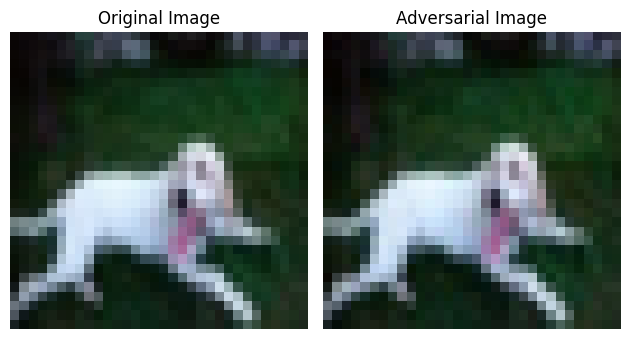

In [63]:
# Select a random image from the test set
index = np.random.randint(0, len(x_test))
image = x_test[index]
true_label = y_test[index]

# Perform BIM attack on the selected image
image = tf.expand_dims(image, axis=0)
label = tf.expand_dims(y_test[index], axis=0)
adversarial_image = bim_attack(model_simple, image, label, epsilon, num_iterations, alpha).numpy()[0]

# Display the original and adversarial images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Adversarial Image")
plt.imshow(adversarial_image)
plt.axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 51ms/step


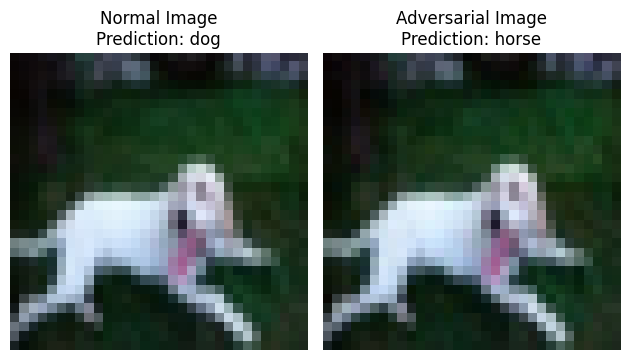

In [64]:
# Make predictions on the normal and adversarial images
normal_predictions = model_simple.predict(image)
adversarial_predictions = model_simple.predict(adversarial_image.reshape(1, 32, 32, 3))

# Convert predictions to class labels
normal_label = np.argmax(normal_predictions)
adversarial_label = np.argmax(adversarial_predictions)

# Display the normal and adversarial images along with the predicted labels
plt.subplot(1, 2, 1)
plt.title(f"Normal Image\nPrediction: {class_names[normal_label]}")
plt.imshow(image[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Adversarial Image\nPrediction: {class_names[adversarial_label]}")
plt.imshow(adversarial_image)
plt.axis('off')

plt.tight_layout()
plt.show()

In [65]:
# Adversarial examples using BIM attack
x_adv_batch = generate_bim_adversarial_batch(model_simple, x_test, y_test,
                                              epsilon, num_iterations, alpha)

In [66]:
# Evaluate the model accuracy on adversarial examples
accuracy = evaluate_model_accuracy(model_simple, x_adv_batch, y_test)
print(f"Accuracy on BIM adversarial examples: {accuracy}")

313/313 [==============================] - 3s 11ms/step
Accuracy on BIM adversarial examples: 0.1826


### DenseNet Model

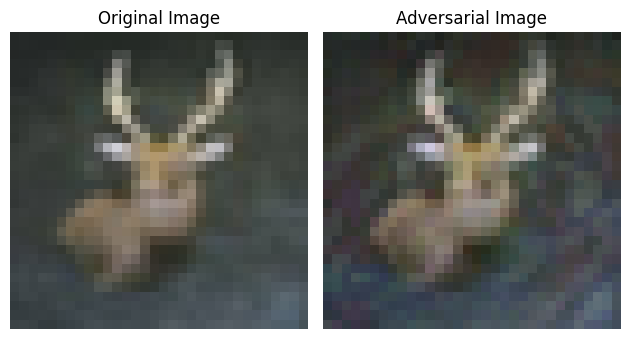

In [67]:
# Select a random image from the test set
index = np.random.randint(0, len(x_test))
image = x_test[index]
true_label = y_test[index]

# Perform BIM attack on the selected image
image = tf.expand_dims(image, axis=0)
label = tf.expand_dims(y_test[index], axis=0)
adversarial_image = bim_attack(model, image, label, epsilon, num_iterations, alpha).numpy()[0]

# Display the original and adversarial images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Adversarial Image")
plt.imshow(adversarial_image)
plt.axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 46ms/step


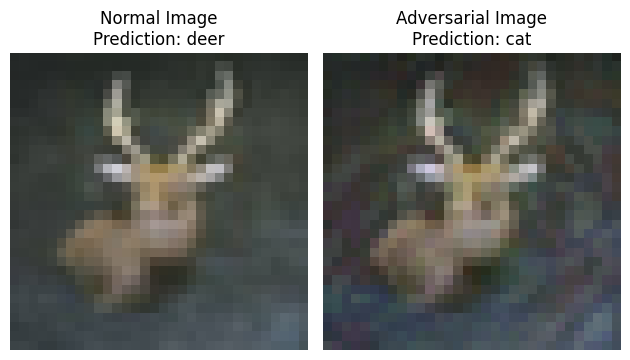

In [68]:
# Make predictions on the normal and adversarial images
normal_predictions = model.predict(image)
adversarial_predictions = model.predict(adversarial_image.reshape(1, 32, 32, 3))

# Convert predictions to class labels
normal_label = np.argmax(normal_predictions)
adversarial_label = np.argmax(adversarial_predictions)

# Display the normal and adversarial images along with the predicted labels
plt.subplot(1, 2, 1)
plt.title(f"Normal Image\nPrediction: {class_names[normal_label]}")
plt.imshow(image[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Adversarial Image\nPrediction: {class_names[adversarial_label]}")
plt.imshow(adversarial_image)
plt.axis('off')

plt.tight_layout()
plt.show()

In [69]:
# Batch of Adversarial examples using BIM attack
x_adv_batch_dense = generate_bim_adversarial_batch(model, x_test, y_test,
                                              epsilon, num_iterations, alpha)

# Evaluate the model accuracy on adversarial examples
accuracy = evaluate_model_accuracy(model, x_adv_batch_dense, y_test)
print(f"Accuracy on BIM adversarial examples: {accuracy}")

313/313 [==============================] - 31s 100ms/step
Accuracy on BIM adversarial examples: 0.0073


## Results

|    Model   | Normal Accuracy | Attack Type | Accuracy on Attack Examples |
|:----------:|:---------------:|:-----------:|:---------------------------:|
| Simple CNN |      72.79%     | FGSM Attack |            19.18%           |
| Simple CNN |      72.79%     |  BIM Attack |            18.26%           |
|  DenseNet  |      66.94%     | FGSM Attack |            1.79%            |
|  DenseNet  |      66.94%     |  BIM Attack |            0.73%            |

## References

* Kurakin, A., Goodfellow, I., \& Bengio, S. (2016). Adversarial examples in the physical world. arXiv preprint arXiv:1607.02533.
* Papernot, N., McDaniel, P., Goodfellow, I., Jha, S., Celik, Z. B., \& Swami, A. (2017). Practical black-box attacks against machine learning. Proceedings of the 2017 ACM on Asia Conference on Computer and Communications Security, 506-519.
* Goodfellow, I. J., Shlens, J., \& Szegedy, C. (2015). Explaining and harnessing adversarial examples. arXiv preprint arXiv:1412.6572.
* Madry, A., Makelov, A., Schmidt, L., Tsipras, D., \& Vladu, A. (2018). Towards deep learning models resistant to adversarial attacks. International Conference on Learning Representations (ICLR).
* Krizhevsky, A., \& Hinton, G. (2009). Learning multiple layers of features from tiny images. Technical report, University of Toronto.
* Simonyan, K., \& Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.
* Huang, G., Liu, Z., Van Der Maaten, L., \& Weinberger, K. Q. (2017). Densely connected convolutional networks. Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition, 4700-4708.
* Krizhevsky, A., \& Hinton, G. (2009). Learning multiple layers of features from tiny images. Technical report, University of Toronto.
* Krizhevsky, A., \& Hinton, G. (2010). Convolutional deep belief networks on CIFAR-10. Unpublished manuscript, University of Toronto.
* [TensorFlow](https://www.tensorflow.org/)
* [Keras](https://keras.io/)
